In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Visualization 
import matplotlib.pyplot as plt
import missingno # To install this package with conda run one of the following: conda install -c conda-forge missingno 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

C:\Users\match\AppData\Local\Temp\ipykernel_27532\3333104232.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# Step 1. Explore Data

Perform exploratory analysis on the variables using the whole data set.
Describe the data and comment on your observations/findings.

##### The NHANES GH dataset contains various health-related measurements collected from participants. The dataset includes demographic information, medical history, and physical examination data.

#### Key Points of the Dataset:
1. Demographic Variables: Such as age, sex, and race/ethnicity.
2. Health Metrics: Including glycohemoglobin (GH), weight, height, BMI, various body circumferences, skinfold measurements, and blood markers like albumin, blood urea nitrogen, and creatinine.
3. Medical History: Information about whether the participants are on insulin or diabetes medications.


#### Response Variable:
The response variable in this dataset is likely to be diabetes, which is a binary variable indicating whether the participant has diabetes (often derived from the glycohemoglobin measurements, typically GH >= 6.5%).


In [3]:
# Load dataset
df = pd.read_excel('Glycohemoglobin_t5_ShortName.xlsx')

#### diabetes is a response variable.
#### On_Insulin_or_Diabetes Meds and Sex are binary variables.
#### Race_Or_Ethnicity is a catogory variables.
#### The rest of the vaaluable are numeric or quantiative predictors.
#### Some of the predictors have missing values such as income_min, income_max, Suvscapular_Sk etc.

In [4]:
dftrain = df.dropna(axis=0)

# Descriptive Statistics

In [5]:
print("Dimensions of training dataset: {}".format(dftrain.shape))

Dimensions of training dataset: (4322, 21)


In [6]:
dftrain.head(2)

,Respondent_SeqNo,diabetes,Sex,Age,Race_Or_Ethnicity,Income_Min,Income_Max,On_Insulin_or_Diabetes_Meds,Weight_Kg,Height_cm,...,Up_Leg_Len,Up_Arm_Len,Arm_Cir,Waist_Cir,Triceps_Sk,Subscapular_Sk,Albumin,Blood_Urea,Creatinine,gh
0,51624,0,male,34.2,Non-Hispanic White,25000.0,35000.0,0,87.4,164.7,...,41.5,40.0,36.4,100.4,16.4,24.9,4.8,6.0,0.94,5.2
1,51626,0,male,16.8,Non-Hispanic Black,45000.0,55000.0,0,72.3,181.3,...,42.0,39.5,26.6,74.7,10.2,10.5,4.6,9.0,0.89,5.7


In [7]:
print(dftrain.dtypes)

Respondent_SeqNo                 int64
diabetes                         int64
Sex                             object
Age                            float64
Race_Or_Ethnicity               object
Income_Min                     float64
Income_Max                     float64
On_Insulin_or_Diabetes_Meds      int64
Weight_Kg                      float64
Height_cm                      float64
BMI                            float64
Up_Leg_Len                     float64
Up_Arm_Len                     float64
Arm_Cir                        float64
Waist_Cir                      float64
Triceps_Sk                     float64
Subscapular_Sk                 float64
Albumin                        float64
Blood_Urea                     float64
Creatinine                     float64
gh                             float64
dtype: object


In [8]:
dftrain.describe(include="all")

,Respondent_SeqNo,diabetes,Sex,Age,Race_Or_Ethnicity,Income_Min,Income_Max,On_Insulin_or_Diabetes_Meds,Weight_Kg,Height_cm,...,Up_Leg_Len,Up_Arm_Len,Arm_Cir,Waist_Cir,Triceps_Sk,Subscapular_Sk,Albumin,Blood_Urea,Creatinine,gh
count,4322.000000,4322.000000,4322,4322.000000,4322,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,...,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
unique,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,Non-Hispanic White,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2198,NaN,1971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,56852.751041,0.115919,NaN,43.557589,NaN,32429.430819,42085.839889,0.077279,75.498565,166.855484,...,38.414438,36.718325,31.586395,93.507635,18.071286,19.847085,4.300185,12.734151,0.869285,5.611569
std,3047.157263,0.320164,NaN,21.326556,NaN,22285.730376,27403.746483,0.267065,18.301318,10.142944,...,3.880050,2.730337,4.633854,15.146504,8.066894,8.301034,0.318067,5.583880,0.361461,0.873991
min,51624.000000,0.000000,NaN,12.000000,NaN,0.000000,5000.000000,0.000000,28.000000,135.400000,...,24.000000,27.000000,17.900000,56.600000,2.600000,3.800000,2.500000,1.000000,0.320000,4.000000
25%,54246.500000,0.000000,NaN,23.600000,NaN,15000.000000,20000.000000,0.000000,62.700000,159.500000,...,35.900000,34.800000,28.400000,82.200000,11.400000,13.000000,4.100000,9.000000,0.700000,5.200000
50%,56817.000000,0.000000,NaN,42.200000,NaN,25000.000000,35000.000000,0.000000,73.900000,166.500000,...,38.400000,36.600000,31.500000,93.300000,17.000000,19.200000,4.300000,12.000000,0.820000,5.400000
75%,59483.750000,0.000000,NaN,61.600000,NaN,45000.000000,55000.000000,0.000000,86.400000,174.100000,...,41.000000,38.500000,34.600000,103.375000,24.000000,26.000000,4.500000,15.000000,0.980000,5.800000


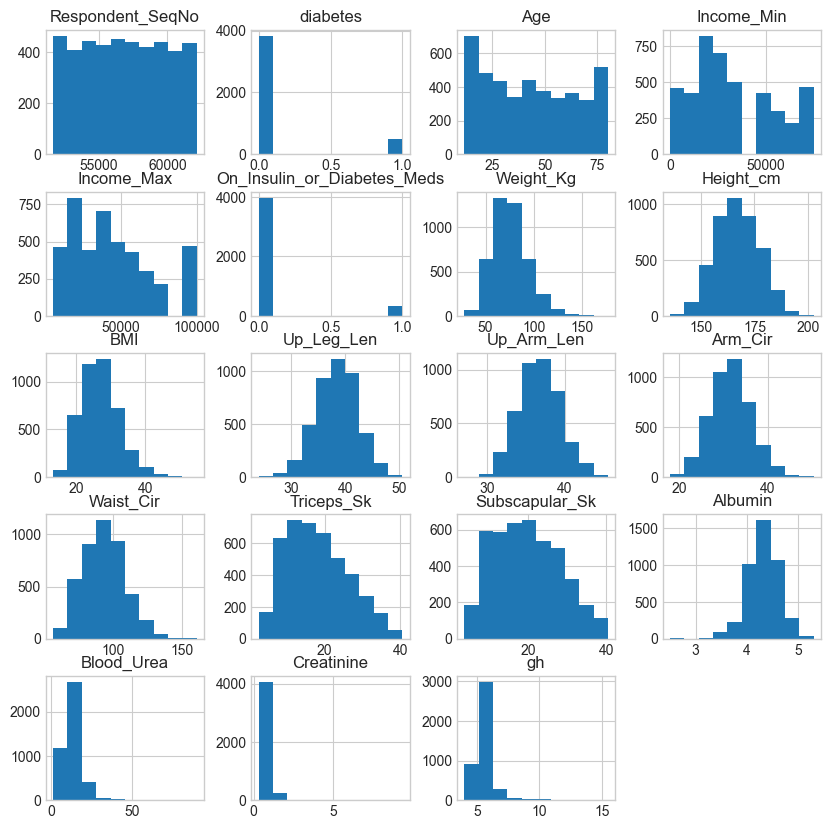

In [9]:
# histograms
dftrain.hist(figsize=(10,10))
plt.show()

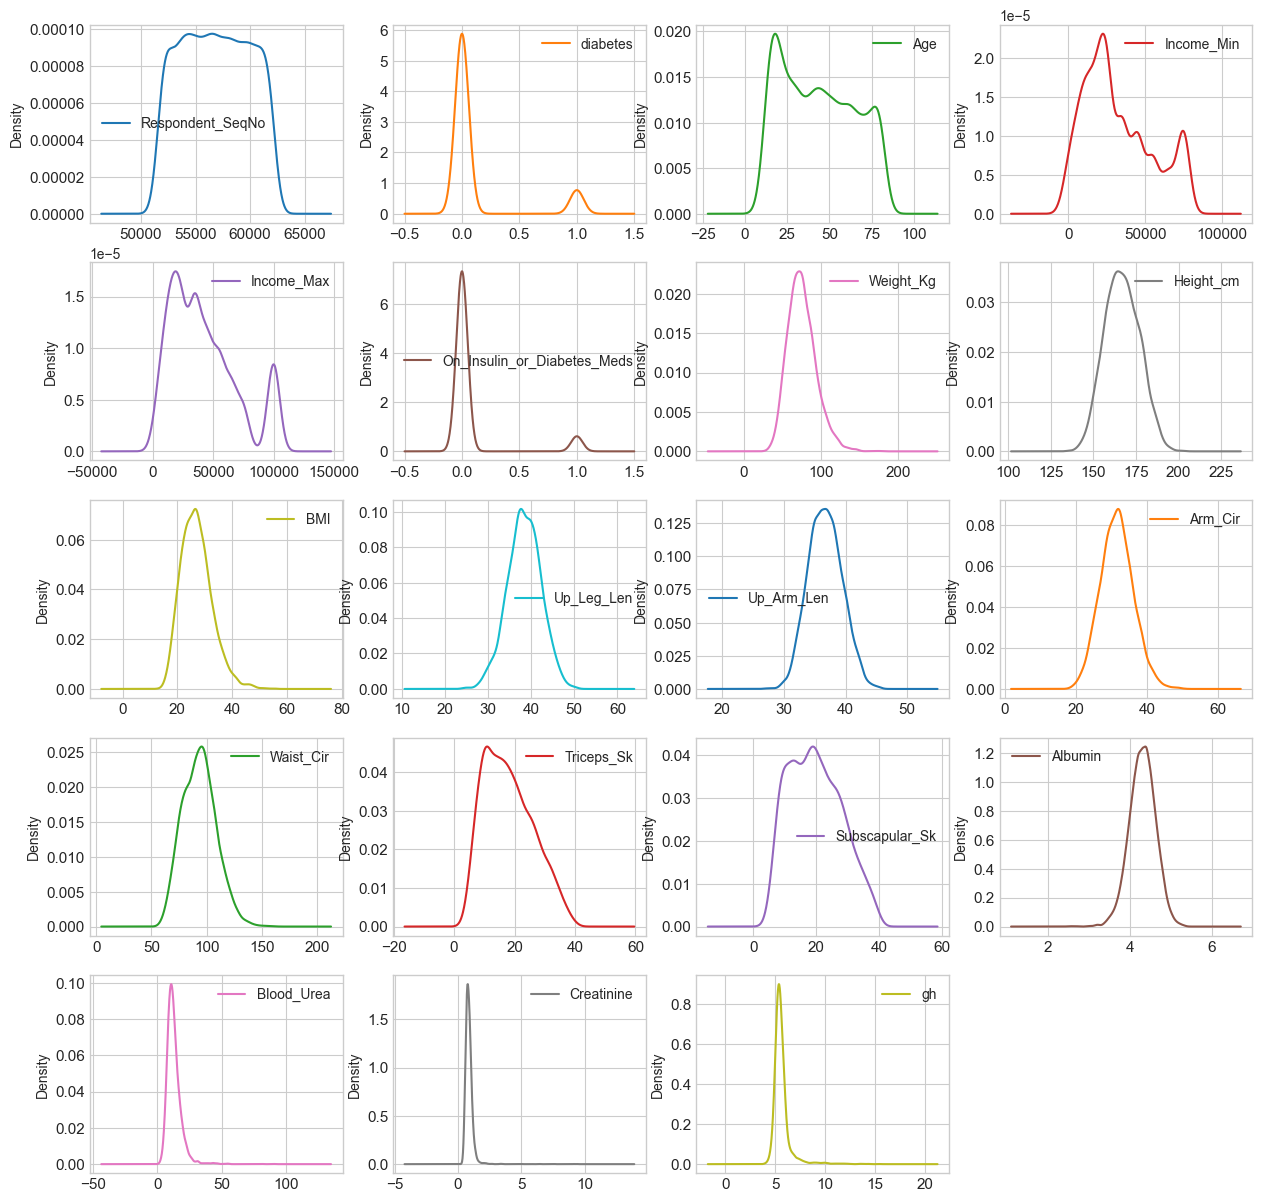

In [10]:
# density
#dftrain.plot(kind='density', subplots=True, layout=(5, 4), sharex=False, legend=True, fontsize=11, figsize=(15, 15))
#plt.show()
num_columns = dftrain.shape[1]
num_rows = math.ceil(num_columns / 4)

# density
dftrain.plot(kind='density', subplots=True, layout=(num_rows, 4), sharex=False, legend=True, fontsize=11, figsize=(15, num_rows * 3))
plt.show()

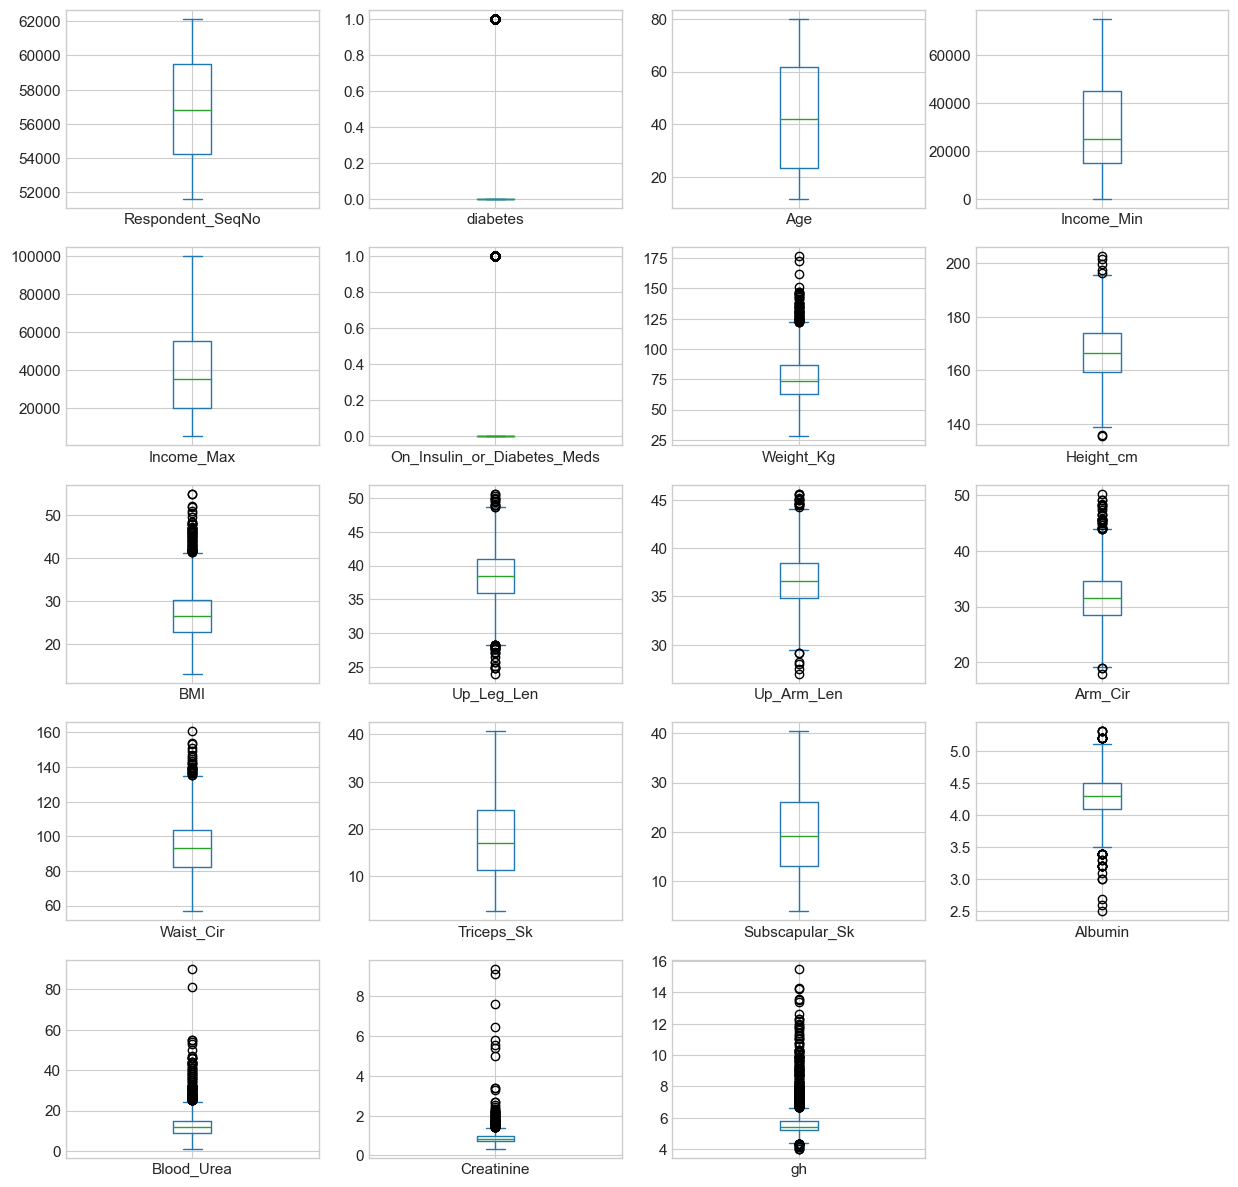

In [11]:
# box and whisker plots
num_columns = dftrain.shape[1]
num_rows = math.ceil(num_columns / 4)

# box and whisker plots
dftrain.plot(kind='box', subplots=True, layout=(num_rows, 4), sharex=False, sharey=False, fontsize=11, figsize=(15, num_rows * 3))
plt.show()

### How many male and female are diagnosed diabetes?

"diabetes" (Target variable)
The target variable is meant for machine learning models to predict the outcome later on.

0 = no diabetes, 1 = diabetes

diabetes
0    3821
1     501
Name: count, dtype: int64


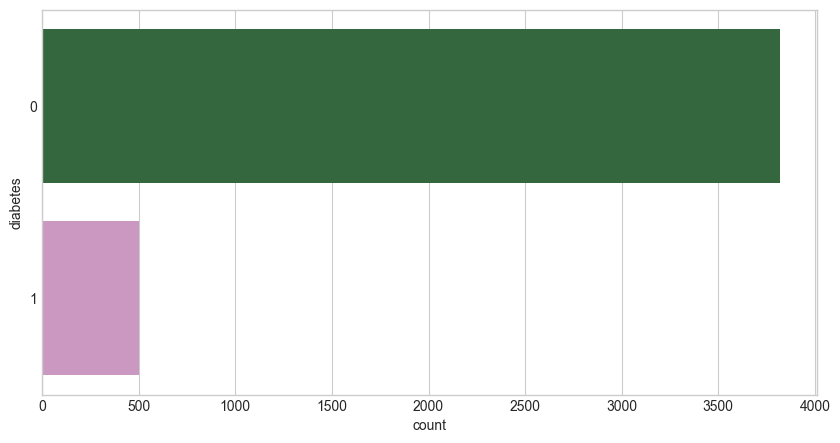

In [12]:
#fig = plt.figure(figsize=(20,1))
#sns.countplot(y='diabetes', data=dftrain);
#print(dftrain.diabetes.value_counts())

fig = plt.figure(figsize=(10, 5))

# Create the count plot with different colors for each group
sns.countplot(y='diabetes', data=dftrain, palette='cubehelix')

# Print the value counts
print(dftrain.diabetes.value_counts())

# Show the plot
plt.show()

### How many males and females are diagnosed DM?

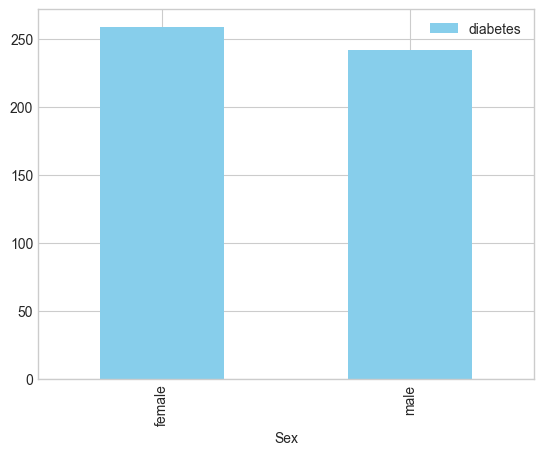

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a pivot table
sex_pivot = dftrain.pivot_table(index="Sex", values="diabetes", aggfunc='sum')

# Plot the bar plot with two different colors
ax = sex_pivot.plot.bar(color=['skyblue', 'salmon'])

# Show the plot
plt.show()

diabetes
0    [[Axes(0.125,0.755806;0.158163x0.124194), Axes...
1    [[Axes(0.125,0.755806;0.158163x0.124194), Axes...
dtype: object

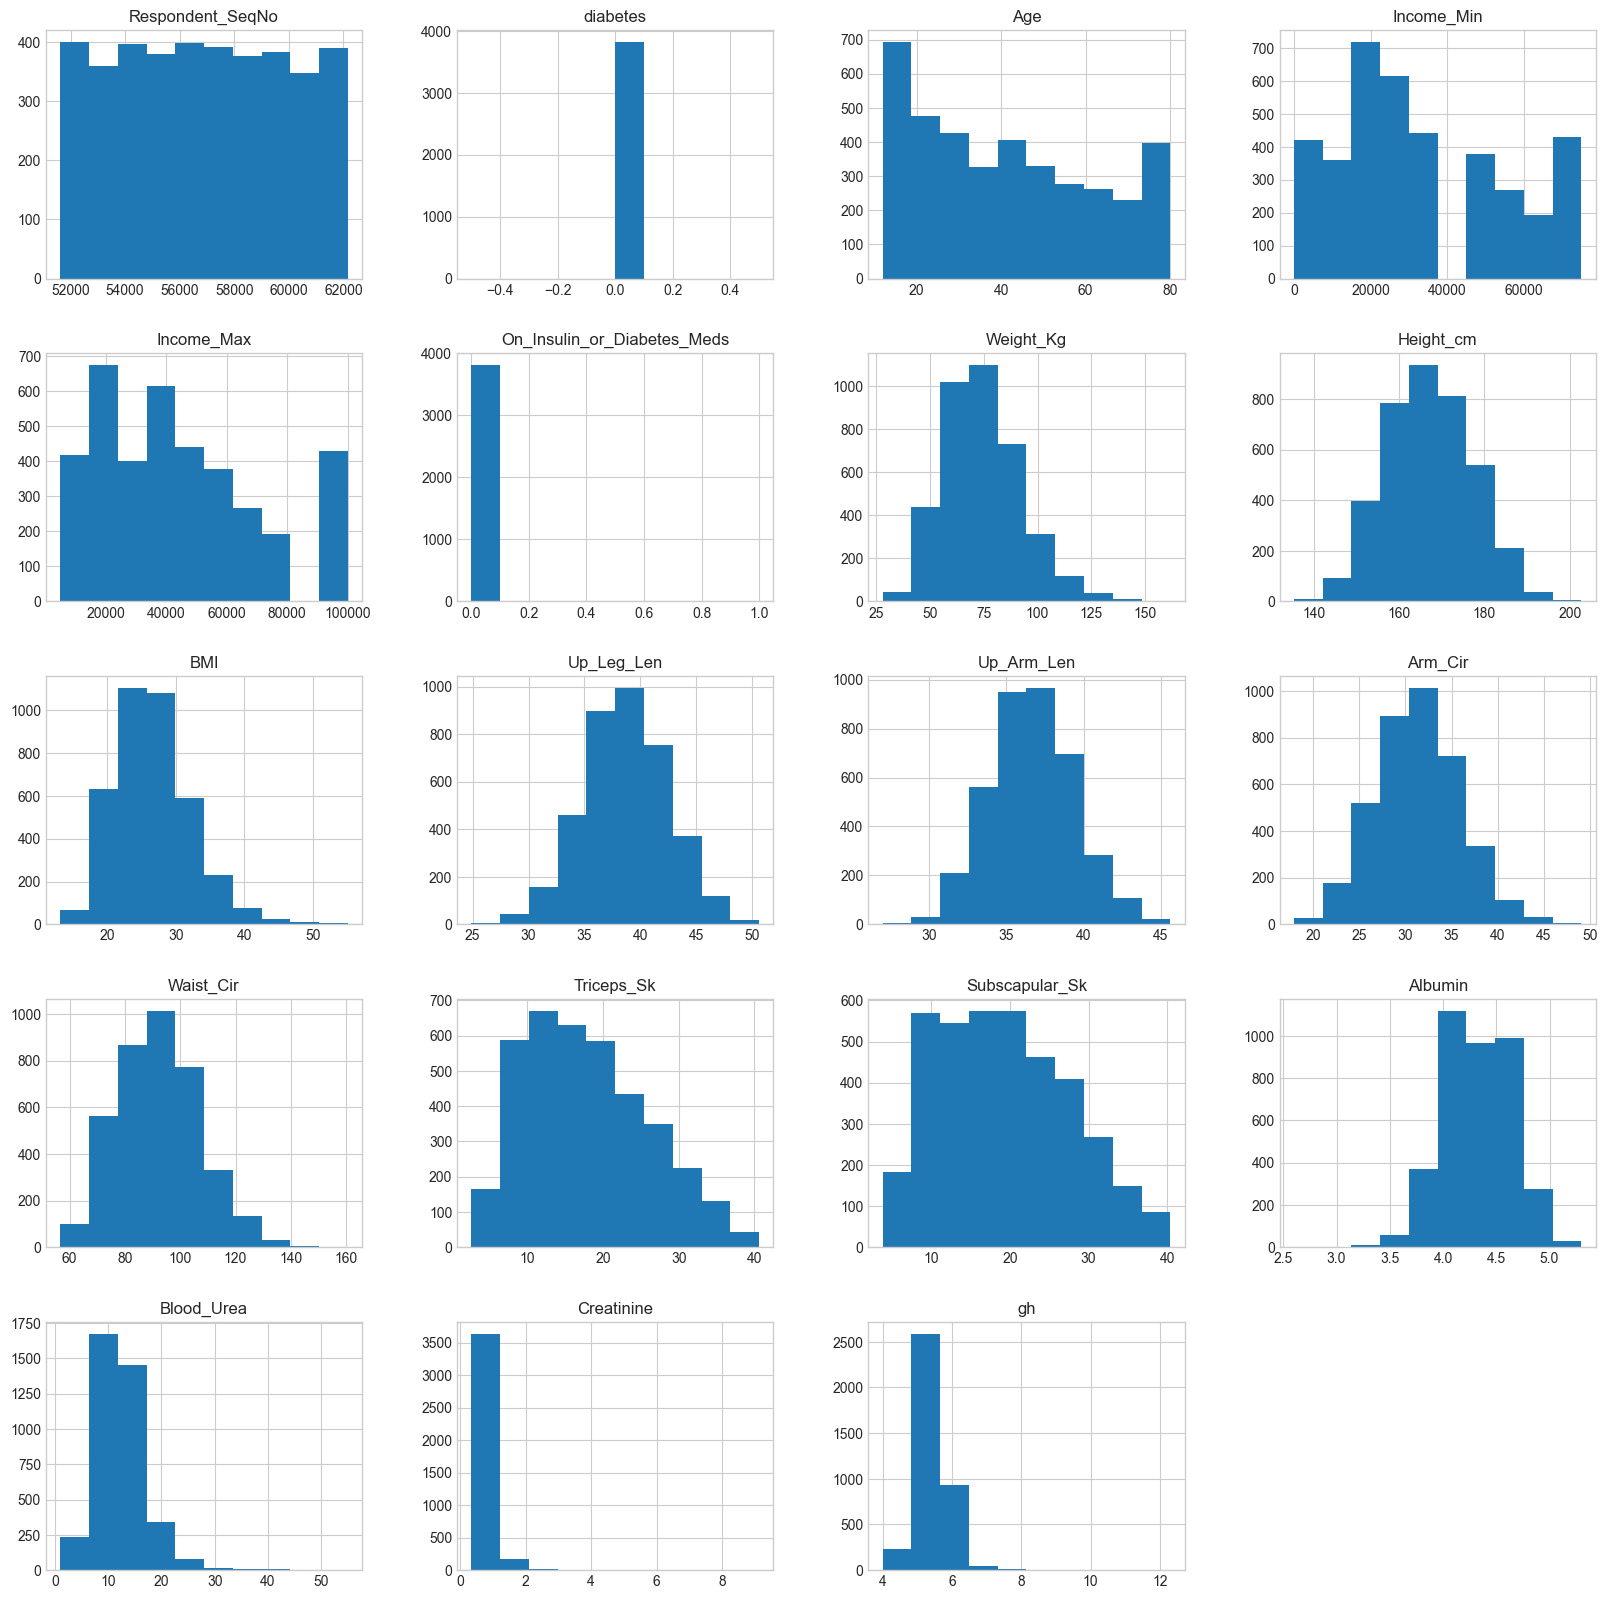

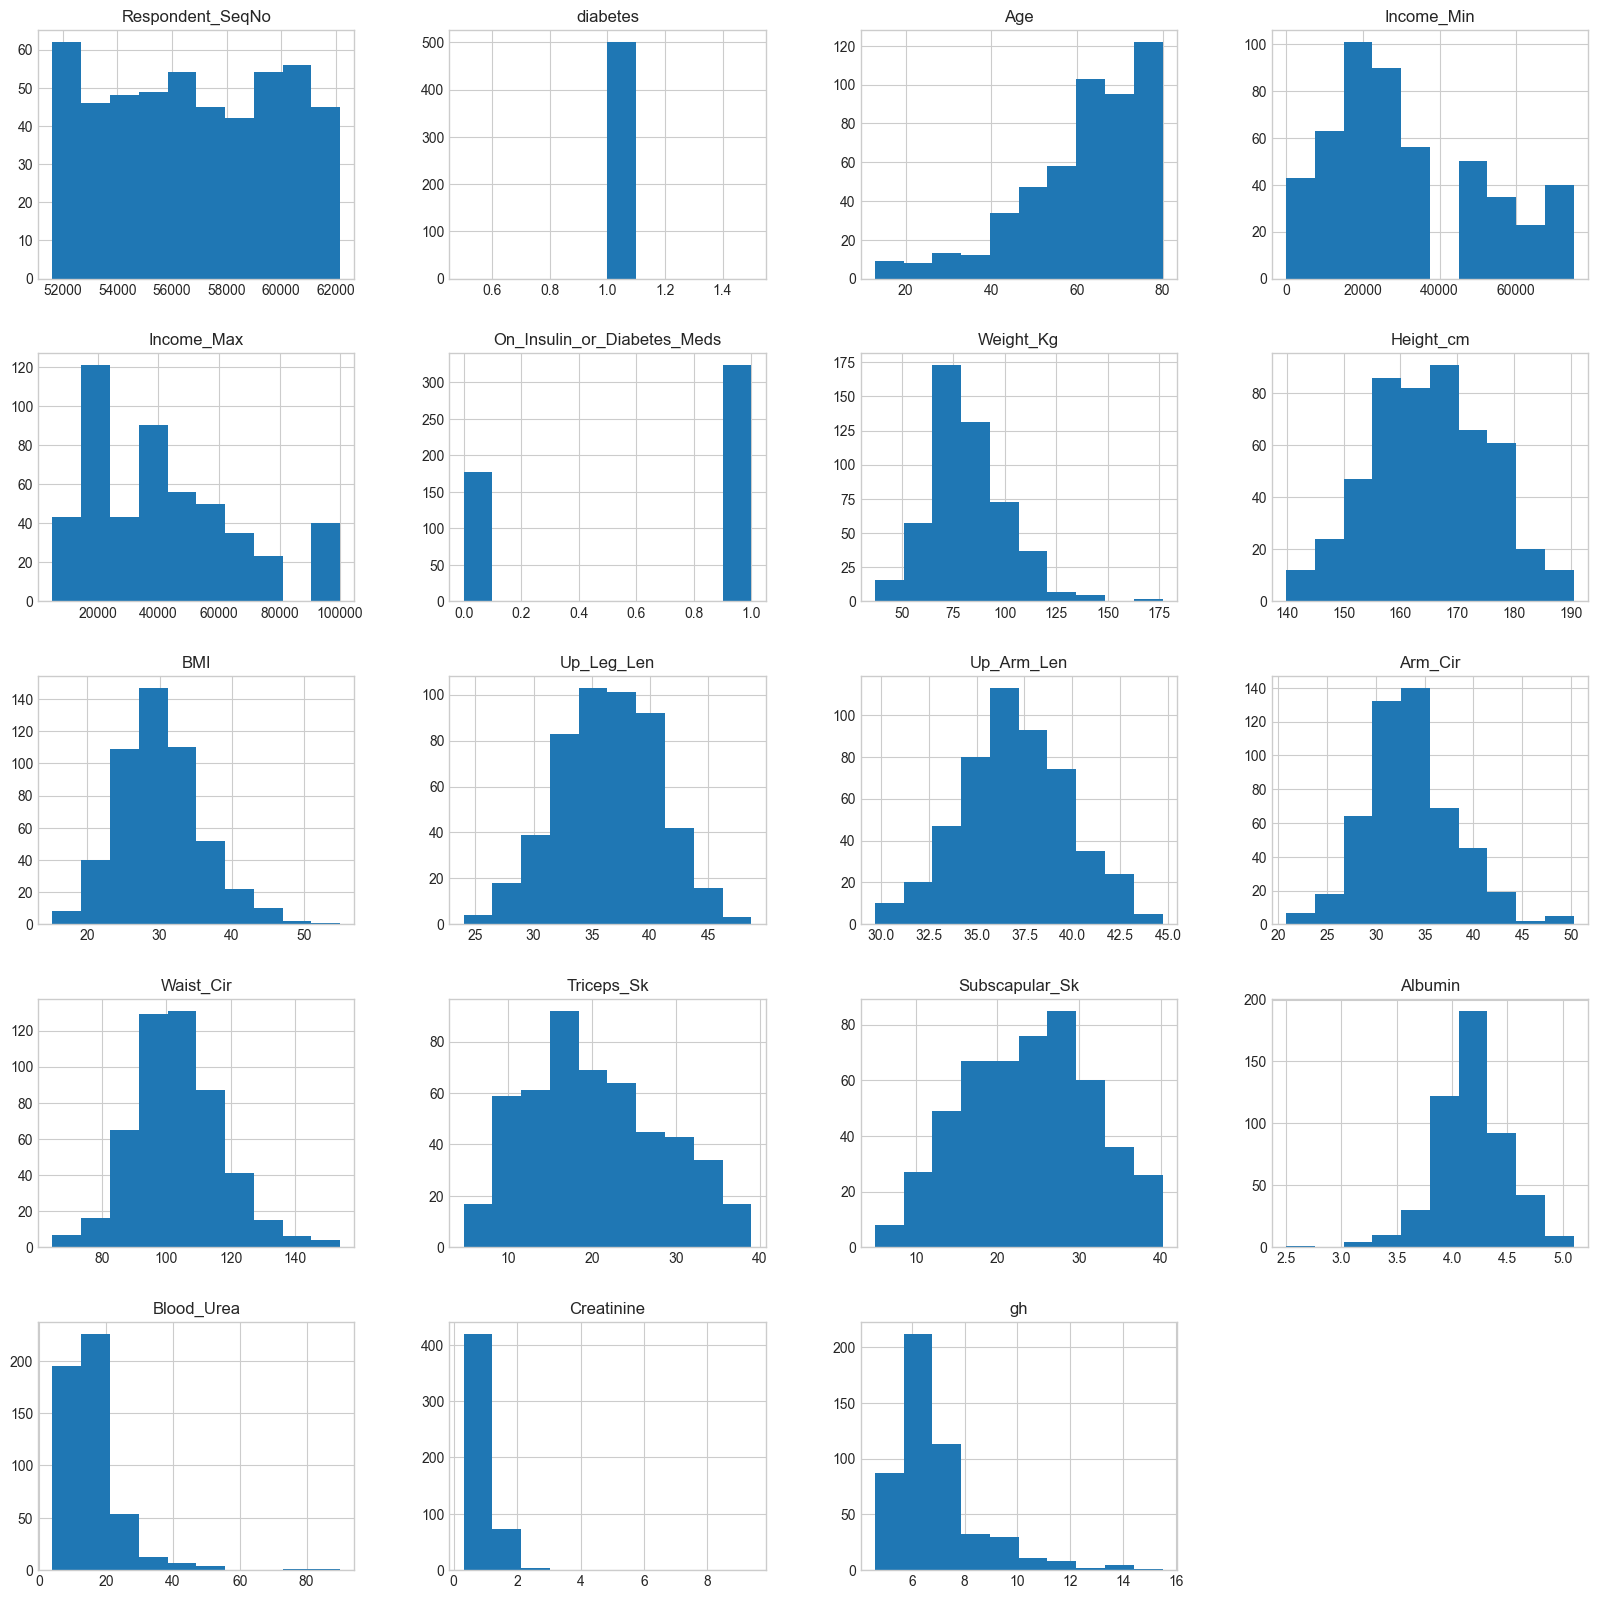

In [14]:
dftrain.groupby('diabetes').hist(figsize=(20,20))

In [15]:
print(round(dftrain.diabetes.sum()/dftrain.diabetes.count(),2))

0.12


There are about 13% of respondents who are diagnosed in DM.

In [16]:
dftrain.groupby(['diabetes','Sex'])['diabetes'].count()

diabetes  Sex   
0         female    1865
          male      1956
1         female     259
          male       242
Name: diabetes, dtype: int64

Male (334) or female are about same with diagnosed DM.

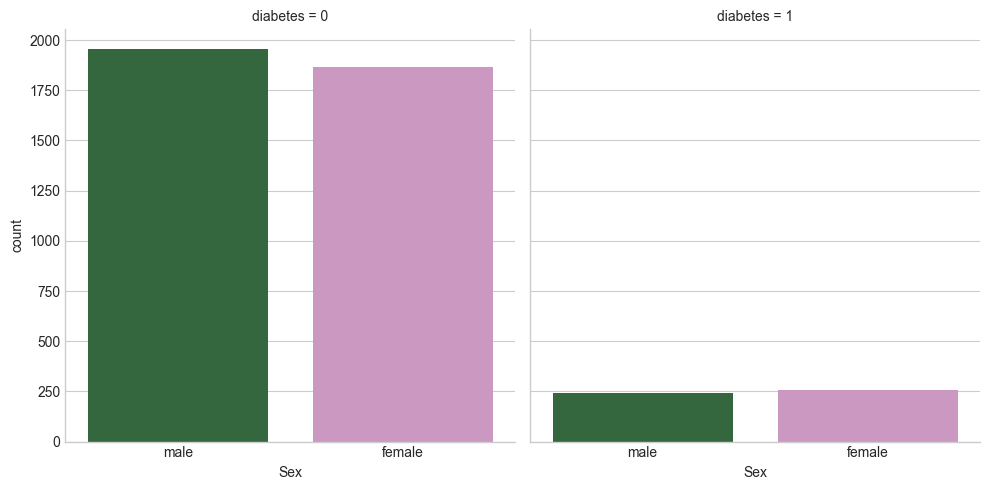

In [17]:
sns.catplot(x='Sex', col='diabetes', kind='count', data=dftrain, palette='cubehelix' );


In [18]:
print("Percentage of female with diabetes: " , round(dftrain[dftrain.Sex == 'female' ].diabetes.sum()/dftrain.diabetes.sum(),2))
print("Percentage of male with diabetes:   " , round(dftrain[dftrain.Sex == 'male' ].diabetes.sum()/dftrain.diabetes.sum(),2))

Percentage of female with diabetes:  0.52
Percentage of male with diabetes:    0.48


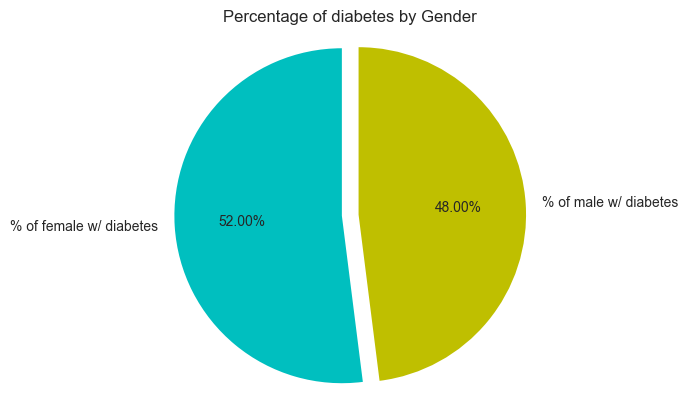

In [19]:
import matplotlib.pyplot as plt
slices = [round(dftrain[dftrain.Sex == 'female'].diabetes.sum()/dftrain.diabetes.sum(),2), 
          round(dftrain[dftrain.Sex == 'male'].diabetes.sum()/dftrain.diabetes.sum(),2)]
activities = ['% of female w/ diabetes', '% of male w/ diabetes']
colors = ['c', 'y']
plt.pie(slices, labels=activities, colors=colors, explode = (0,0.1), startangle=90, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Percentage of diabetes by Gender')
plt.show()

There are five group of Race or Ethnicity. Non-Hispanic Black group has the highest number in the observation. 

1. Mexican American
2. Non-Hispanic Black
3. Non-Hispanic White
4. Other Hispanic
5. Other Race Including Multi-Racial

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


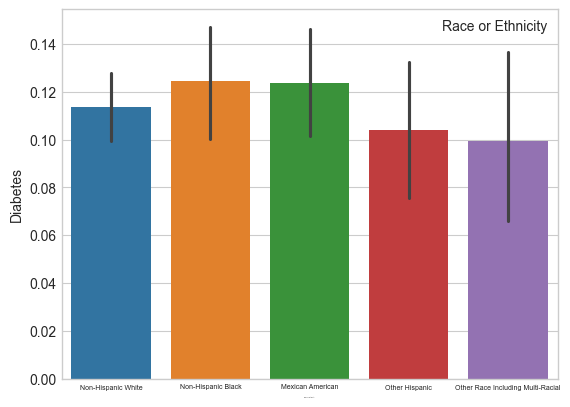

In [20]:
#sns.barplot('Race_Or_Ethnicity', 'diabetes', data=dftrain, color="c")
#sns.barplot(x='Race_Or_Ethnicity', y='diabetes', data=dftrain, hue='Race_Or_Ethnicity')
#plt.show()

sns.barplot(x='Race_Or_Ethnicity', y='diabetes', data=dftrain, hue='Race_Or_Ethnicity')

# Adjust the font size for x-axis, y-axis labels, and legend
plt.xlabel('Race or Ethnicity', fontsize=0.5)  # Adjust fontsize as needed
plt.ylabel('Diabetes', fontsize=10)  # Adjust fontsize as needed
plt.legend(title='Race or Ethnicity', fontsize=8)  # Adjust fontsize as needed
plt.xticks(fontsize=5) 

# Show the plot
plt.show()


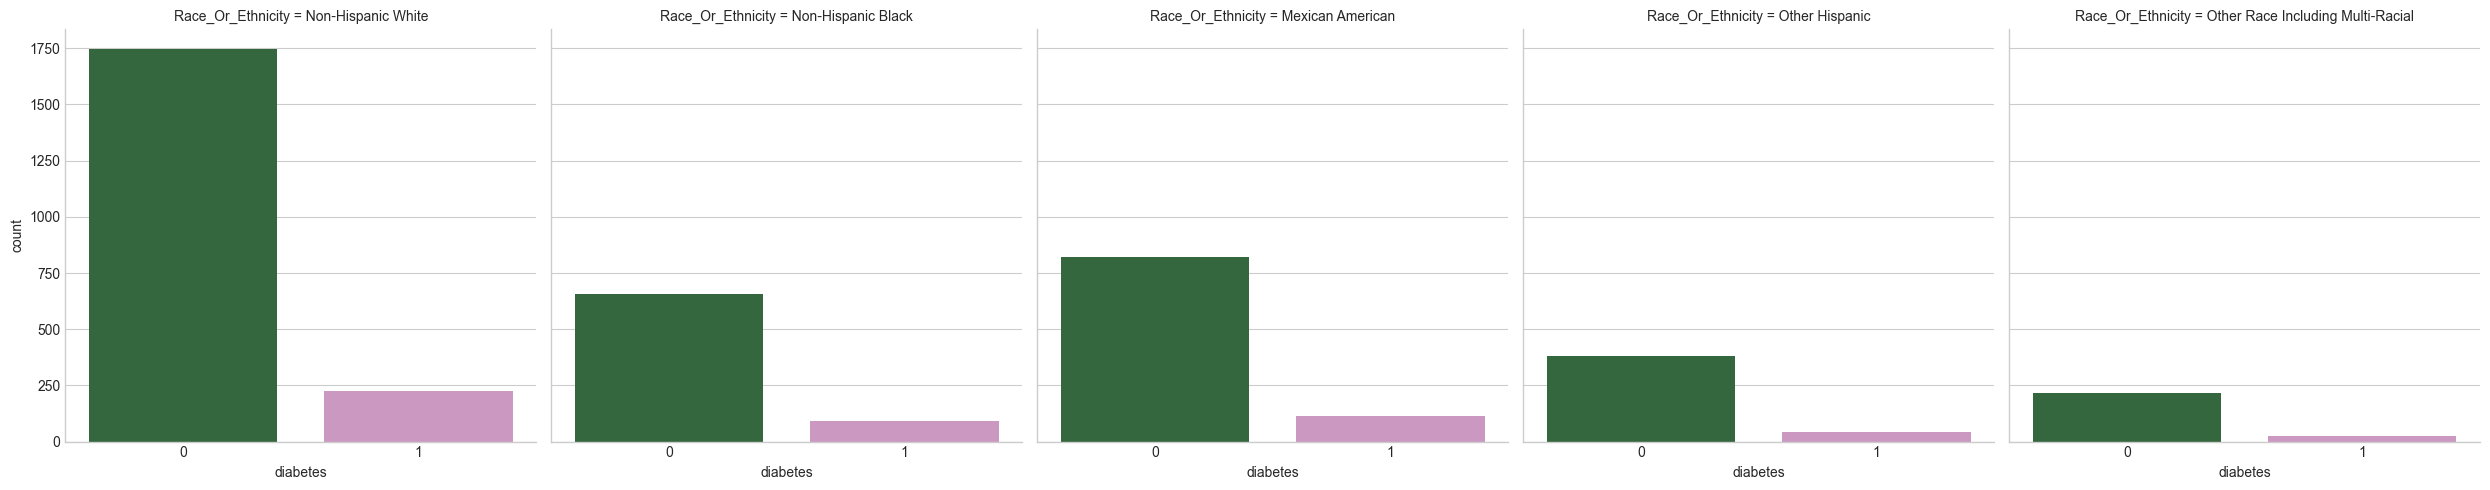

In [21]:
sns.catplot(x='diabetes', col='Race_Or_Ethnicity', kind='count', data=dftrain, palette='cubehelix')

In [22]:
pd.crosstab([dftrain.diabetes], [dftrain.Sex, dftrain.Race_Or_Ethnicity], margins=True)

Sex                         female                                        \
Race_Or_Ethnicity Mexican American Non-Hispanic Black Non-Hispanic White   
diabetes                                                                   
0                              383                308                885   
1                               61                 49                109   
All                            444                357                994   

Sex                                                                 \
Race_Or_Ethnicity Other Hispanic Other Race Including Multi-Racial   
diabetes                                                             
0                            182                               107   
1                             25                                15   
All                          207                               122   

Sex                           male                                        \
Race_Or_Ethnicity Mexican American Non-Hispanic Black Non-Hispanic White   
diabetes                                                                   
0                              439                347                862   
1                               55                 44                115   
All                            494                391                977   

Sex                                                                  All  
Race_Or_Ethnicity Other Hispanic Other Race Including Multi-Racial        
diabetes                                                                  
0                            197                               111  3821  
1                             19                                 9   501  
All                          216                               120  4322

## Data Preparation

Check missing data (train dataset)

In [23]:
print(dftrain.isna().any())

Respondent_SeqNo               False
diabetes                       False
Sex                            False
Age                            False
Race_Or_Ethnicity              False
Income_Min                     False
Income_Max                     False
On_Insulin_or_Diabetes_Meds    False
Weight_Kg                      False
Height_cm                      False
BMI                            False
Up_Leg_Len                     False
Up_Arm_Len                     False
Arm_Cir                        False
Waist_Cir                      False
Triceps_Sk                     False
Subscapular_Sk                 False
Albumin                        False
Blood_Urea                     False
Creatinine                     False
gh                             False
dtype: bool


<Axes: >

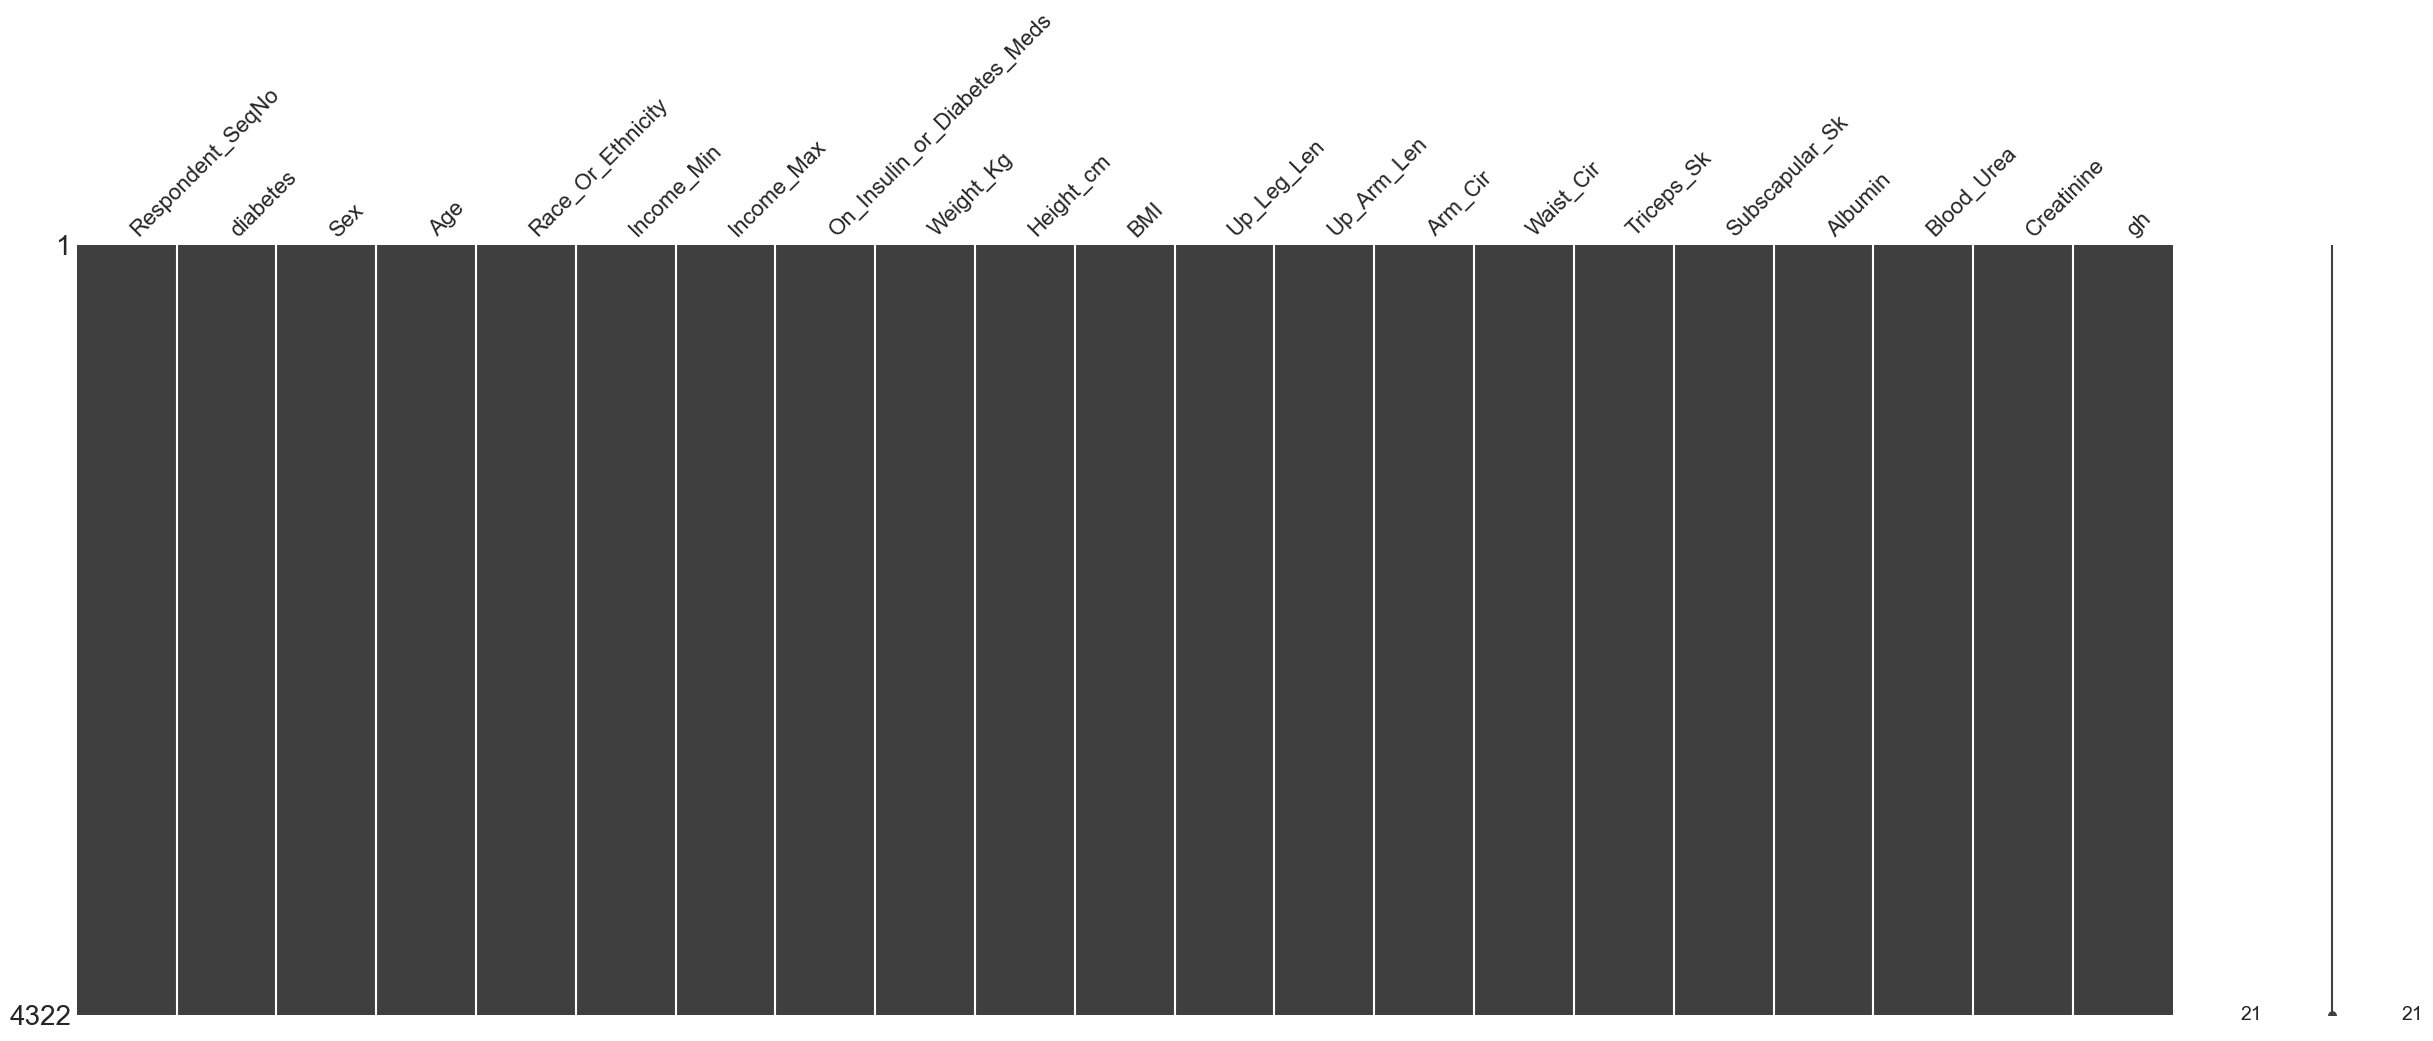

In [24]:
missingno.matrix(dftrain, figsize = (30,10))

In [25]:
dftrain.isnull().sum()

Respondent_SeqNo               0
diabetes                       0
Sex                            0
Age                            0
Race_Or_Ethnicity              0
Income_Min                     0
Income_Max                     0
On_Insulin_or_Diabetes_Meds    0
Weight_Kg                      0
Height_cm                      0
BMI                            0
Up_Leg_Len                     0
Up_Arm_Len                     0
Arm_Cir                        0
Waist_Cir                      0
Triceps_Sk                     0
Subscapular_Sk                 0
Albumin                        0
Blood_Urea                     0
Creatinine                     0
gh                             0
dtype: int64

# Modeling

### Data Preparation

In [26]:
dftrain = dftrain.drop('Respondent_SeqNo', axis=1)

Shift the target variable "diabetes" at last column

In [27]:
cols = list(dftrain.columns)
cols = cols[1:] + [cols[0]]
dftrain = dftrain[cols]
dftrain.head()

,Sex,Age,Race_Or_Ethnicity,Income_Min,Income_Max,On_Insulin_or_Diabetes_Meds,Weight_Kg,Height_cm,BMI,Up_Leg_Len,Up_Arm_Len,Arm_Cir,Waist_Cir,Triceps_Sk,Subscapular_Sk,Albumin,Blood_Urea,Creatinine,gh,diabetes
0,male,34.2,Non-Hispanic White,25000.0,35000.0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,4.8,6.0,0.94,5.2,0
1,male,16.8,Non-Hispanic Black,45000.0,55000.0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,4.6,9.0,0.89,5.7,0
2,female,60.2,Non-Hispanic Black,10000.0,15000.0,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,3.9,10.0,1.11,6.0,1
3,male,26.1,Mexican American,25000.0,35000.0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,4.2,8.0,0.80,5.1,0
4,female,49.7,Non-Hispanic White,35000.0,45000.0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,4.3,13.0,0.79,5.3,0


In [28]:
print(dftrain.isna().any())

Sex                            False
Age                            False
Race_Or_Ethnicity              False
Income_Min                     False
Income_Max                     False
On_Insulin_or_Diabetes_Meds    False
Weight_Kg                      False
Height_cm                      False
BMI                            False
Up_Leg_Len                     False
Up_Arm_Len                     False
Arm_Cir                        False
Waist_Cir                      False
Triceps_Sk                     False
Subscapular_Sk                 False
Albumin                        False
Blood_Urea                     False
Creatinine                     False
gh                             False
diabetes                       False
dtype: bool


In [29]:
#dftest  = dftest.drop(['Respondent_SeqNo', 'diabetes'], axis=1)
#dftest  = dftest.drop(['Respondent_SeqNo'], axis=1)

In [30]:
#print(dftest.isna().any())

Create dummy variables for "Sex", "Race_Or_Ethnicity" and "On_Insulin_or_Diabetes_Meds"

In [31]:
# Convert the categorical values in the train_dataset dataframe to numerical codes. 
## Save the codified data by overwriting train_dataset.drop.
# Print out the mapping of the numerical codes to the categories.

#for col in dftrain['Sex','Race_Or_Ethnicity'].columns:
#  new_df = pd.get_dummies(dftrain[col])
#  dftrain = pd.concat([dftrain, new_df], axis=1)
#  #train_dataset = train_dataset.drop([col], axis=1)
#  print(dftrain.shape)

# List of columns to convert to dummy variables
categorical_cols = ['Sex', 'Race_Or_Ethnicity','On_Insulin_or_Diabetes_Meds']

# Iterate over each column and create dummy variables
for col in categorical_cols:
    # Generate dummy variables
    new_df = pd.get_dummies(dftrain[col], prefix=col)
    
    # Concatenate the new dummy variables with the original DataFrame
    dftrain = pd.concat([dftrain, new_df], axis=1)
    
    # Optionally, drop the original column if no longer needed
    dftrain = dftrain.drop([col], axis=1)
    
    # Print the shape of the DataFrame after each iteration
    print(dftrain.shape)

(4322, 21)
(4322, 25)
(4322, 26)


Correlation heatmap of the train dataset after data preparation

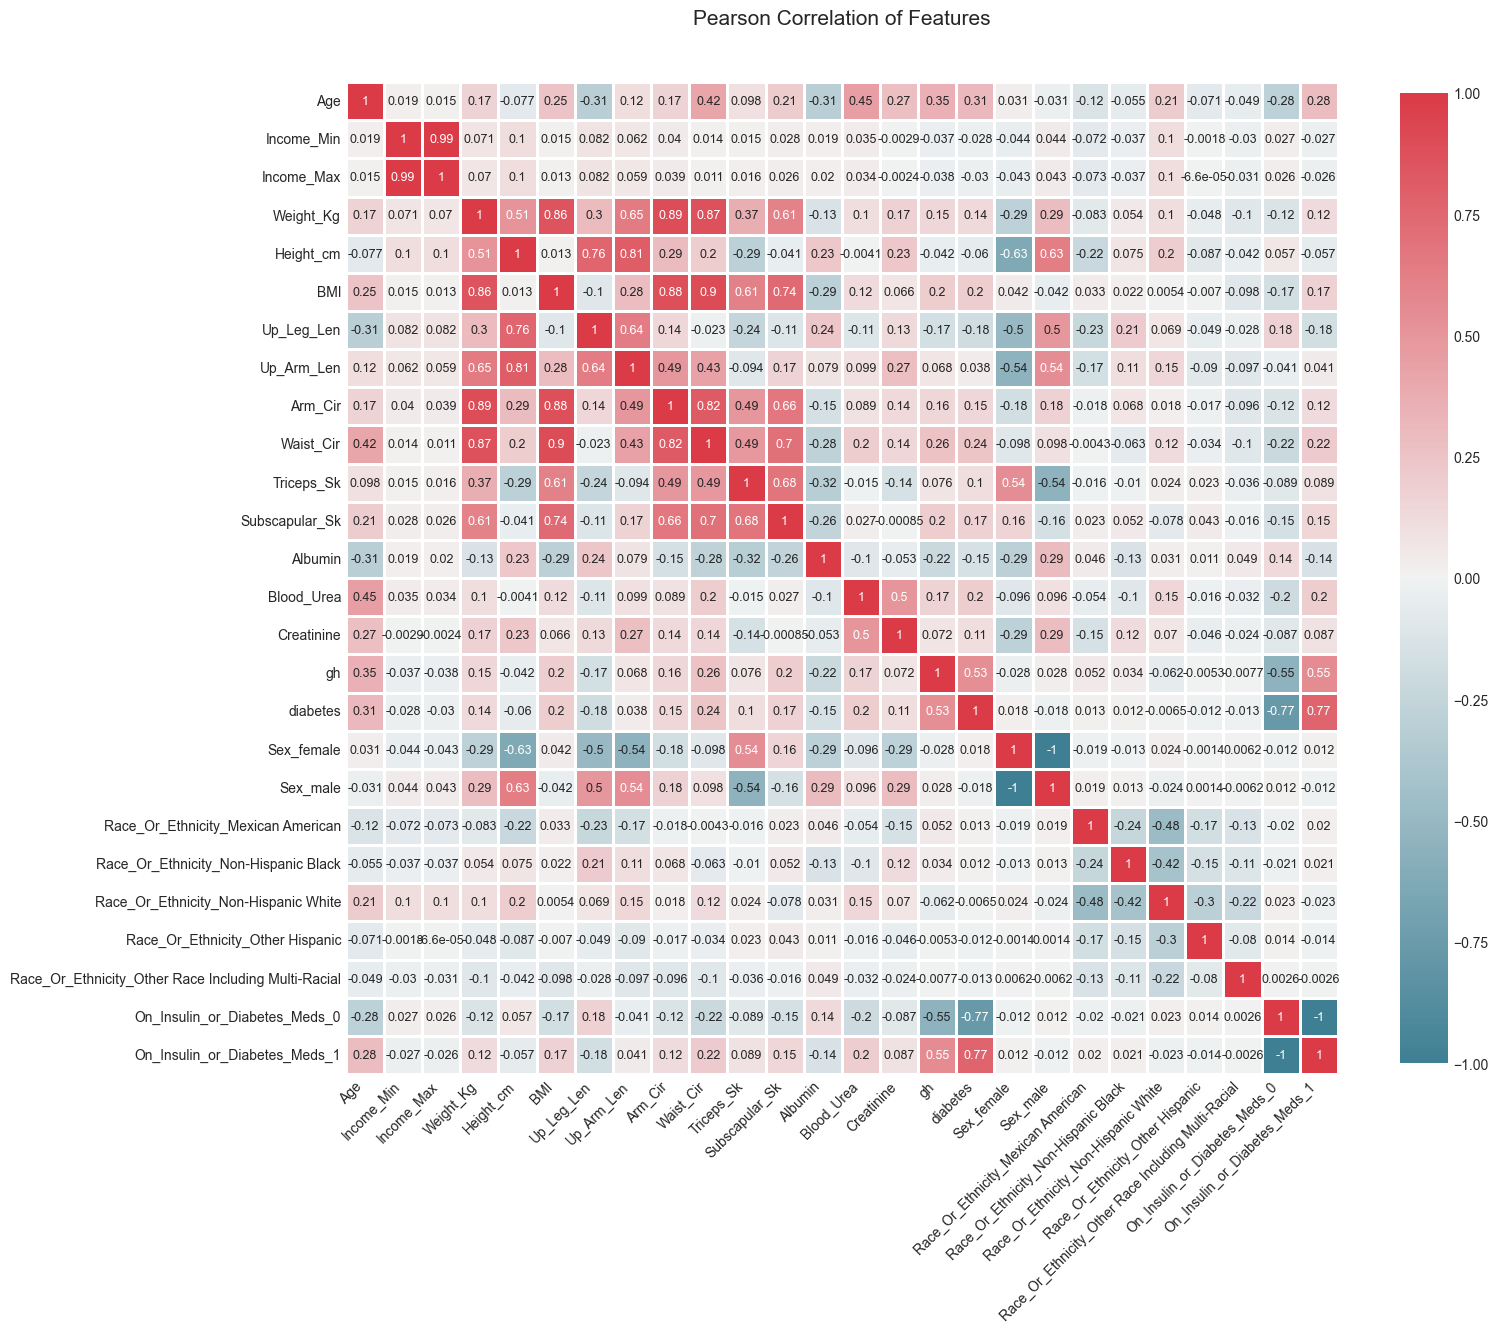

In [32]:
def correlation_heatmap(dftrain):
    plt.figure(figsize=(16, 14))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(
        dftrain.corr(), 
        cmap=colormap,
        square=True, 
        cbar_kws={'shrink': 0.9}, 
        annot=True, 
        linewidths=0.9,
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize': 9}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

correlation_heatmap(dftrain)

# List of columns to convert to dummy variables
categorical_cols = ['Sex', 'Race_Or_Ethnicity','On_Insulin_or_Diabetes_Meds']

# Iterate over each column and create dummy variables
for col in categorical_cols:
    # Generate dummy variables
    new_dft = pd.get_dummies(dftest[col], prefix=col)
    
    # Concatenate the new dummy variables with the original DataFrame
    dftest = pd.concat([dftest, new_dft], axis=1)
    
    # Optionally, drop the original column if no longer needed
    dftest = dftest.drop([col], axis=1)
    
    # Print the shape of the DataFrame after each iteration
    print(dftest.shape)

In [33]:
dftrain = dftrain.dropna(axis=0)

In [34]:
dftrain.shape

(4322, 26)

In [35]:
print(dftrain.isna().any())

Age                                                    False
Income_Min                                             False
Income_Max                                             False
Weight_Kg                                              False
Height_cm                                              False
BMI                                                    False
Up_Leg_Len                                             False
Up_Arm_Len                                             False
Arm_Cir                                                False
Waist_Cir                                              False
Triceps_Sk                                             False
Subscapular_Sk                                         False
Albumin                                                False
Blood_Urea                                             False
Creatinine                                             False
gh                                                     False
diabetes                

<Axes: >

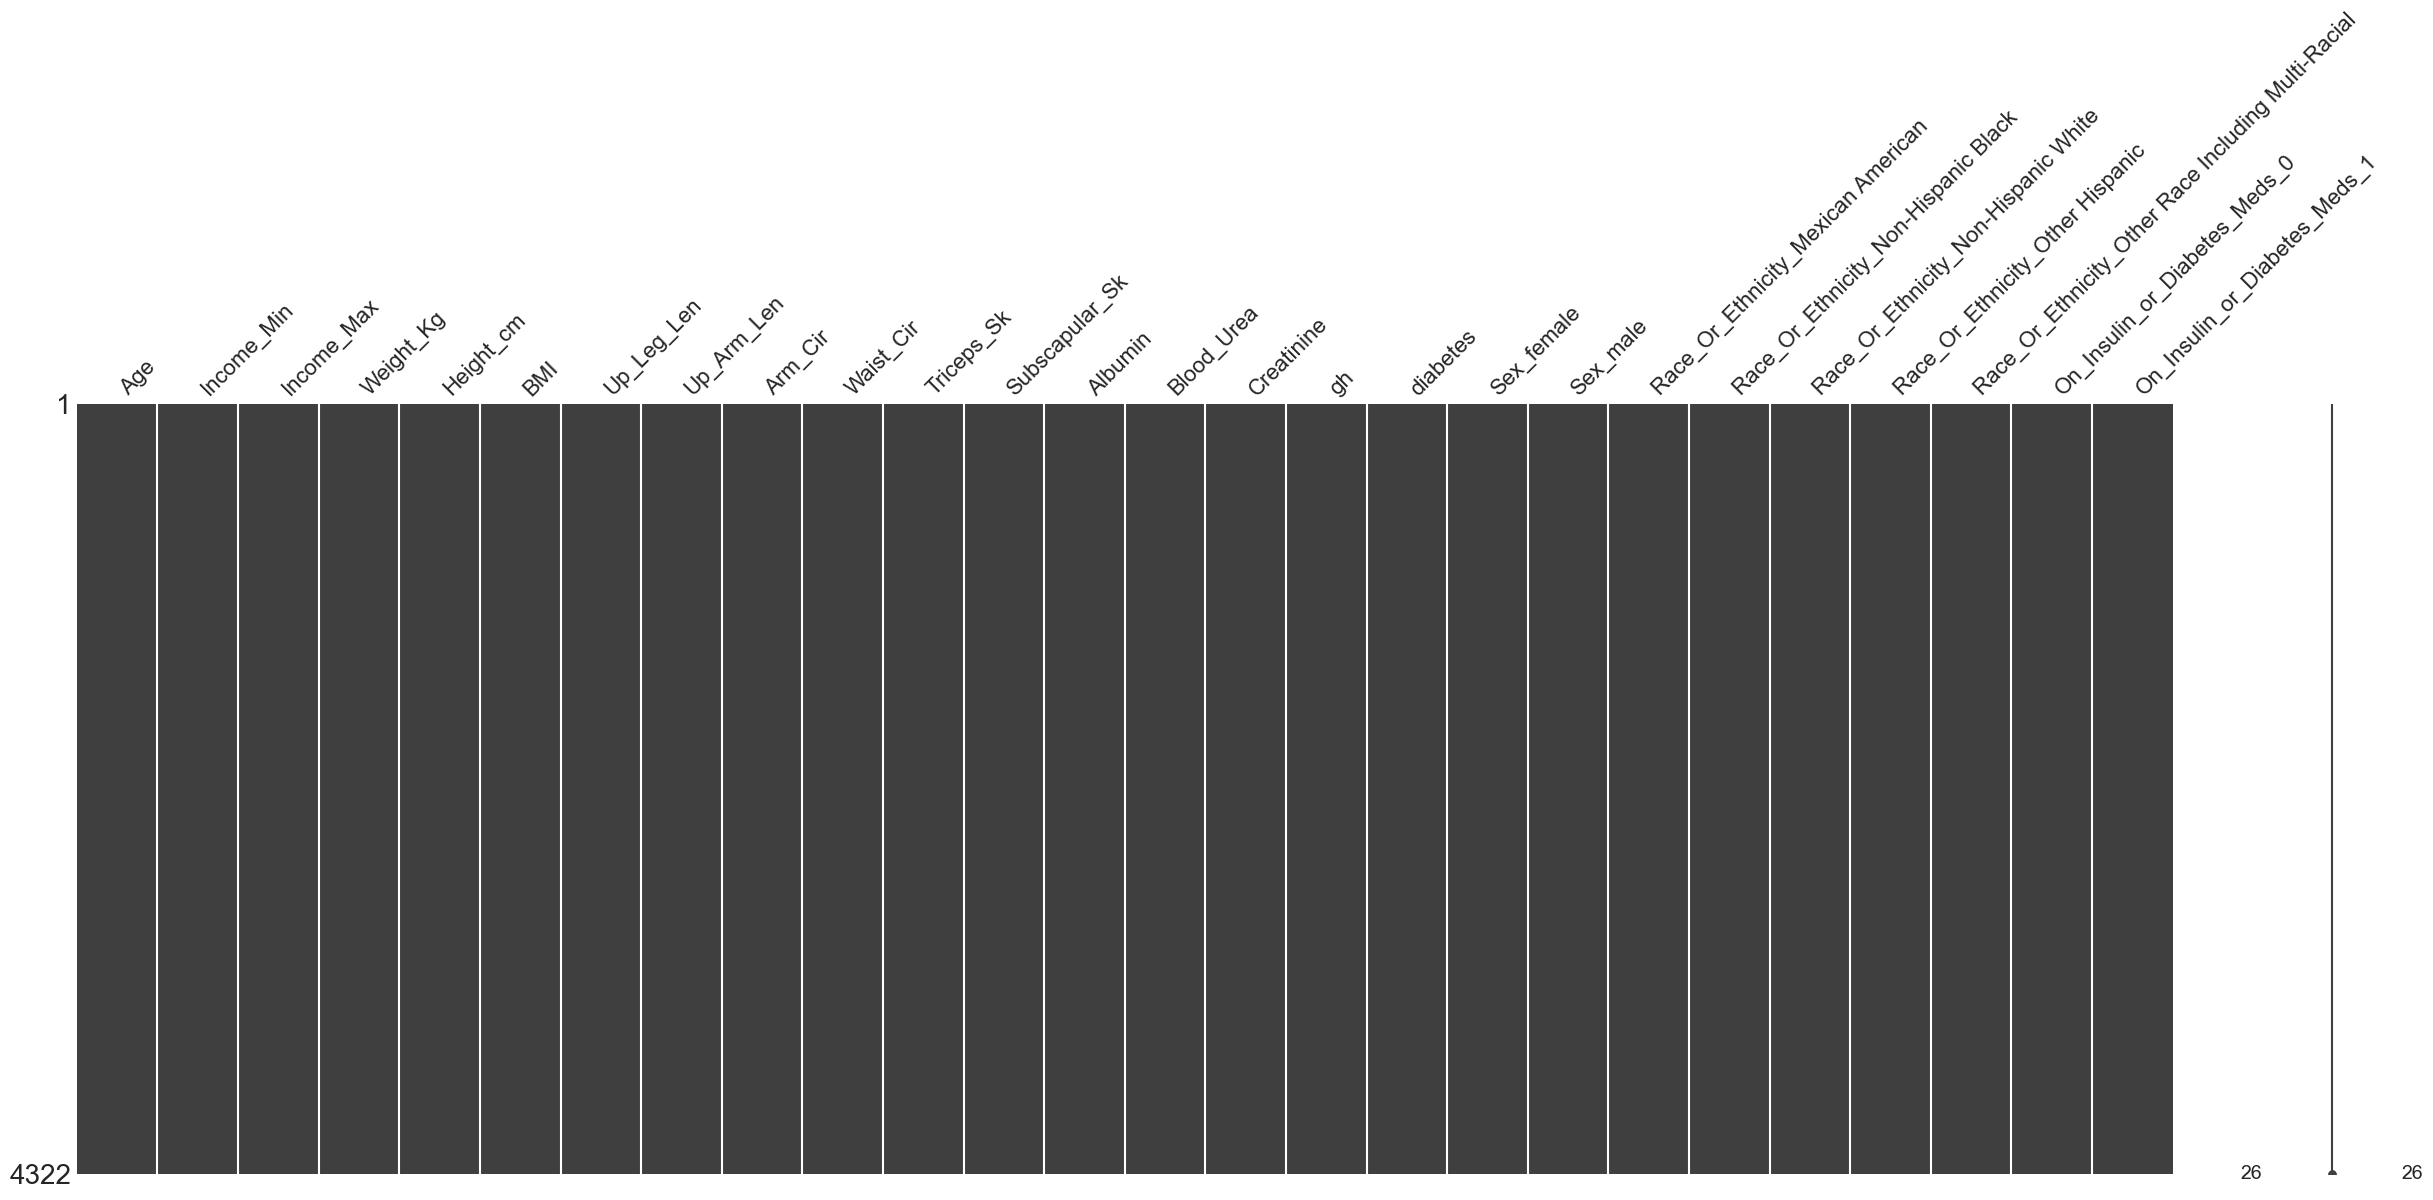

In [36]:
missingno.matrix(dftrain, figsize = (30,10))

## Feature Selection

In [37]:
dftrain.dtypes

Age                                                    float64
Income_Min                                             float64
Income_Max                                             float64
Weight_Kg                                              float64
Height_cm                                              float64
BMI                                                    float64
Up_Leg_Len                                             float64
Up_Arm_Len                                             float64
Arm_Cir                                                float64
Waist_Cir                                              float64
Triceps_Sk                                             float64
Subscapular_Sk                                         float64
Albumin                                                float64
Blood_Urea                                             float64
Creatinine                                             float64
gh                                                     

## Avoid Dummy Varaible Trap

Sex_male, Sex and On_Insulin_or_Diabetes_Meds_1 are not selected in the feature list.

In [38]:
feature_names = ['Age','Income_Min','Income_Max','Weight_Kg','Height_cm','BMI','Up_Leg_Len','Up_Arm_Len','Arm_Cir','Waist_Cir',
                 'Triceps_Sk','Subscapular_Sk','Albumin','Blood_Urea','Creatinine','gh','diabetes','Sex_female',
                 'Race_Or_Ethnicity_Mexican American','Race_Or_Ethnicity_Non-Hispanic Black','Race_Or_Ethnicity_Non-Hispanic White',
                 'Race_Or_Ethnicity_Other Hispanic','Race_Or_Ethnicity_Other Race Including Multi-Racial','On_Insulin_or_Diabetes_Meds_0']
X = dftrain[feature_names]
#y = dftrain.diabetes
y = dftrain['diabetes'] = np.where(dftrain['gh'] >= 6.5, 1, 0)

Split-out Validation Train Dataset

In [39]:
# Split-out validation dataset 80-20
array = dftrain.values
X = X.astype(float)
Y = y
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Test options and evaluation metric

In [40]:
num_folds = 10
seed = 7
scoring = 'accuracy'


In [41]:
# Remove columns where all values are missing
#dftrain = dftrain.dropna(axis=1, how='all', inplace=True)

Spot-Check Algorithms

In [42]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))

Scoring of the Accuracy

In [43]:
names = []
scores = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed , shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    scores.append(cv_results)
    names.append(name)
    
    msg = "Accuracy: %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Accuracy: LR: 0.923045 (0.015685)
Accuracy: LDA: 0.962972 (0.009492)
Accuracy: KNN: 0.916685 (0.013946)
Accuracy: DT: 1.000000 (0.000000)
Accuracy: GNB: 0.927971 (0.015396)
Accuracy: RF: 1.000000 (0.000000)
Accuracy: GB: 1.000000 (0.000000)
Accuracy: SVM: 0.925071 (0.012754)


Compare Algorithms

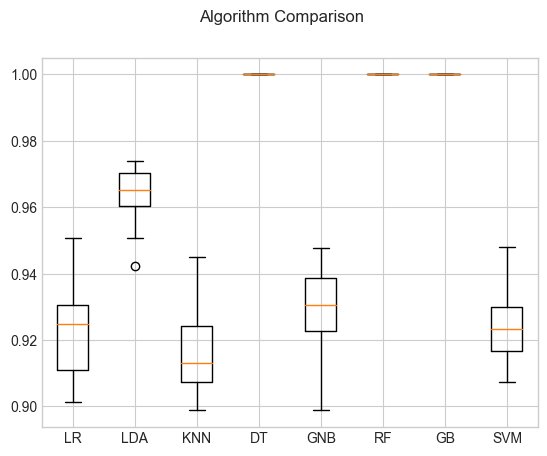

In [44]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

Spot Check of Logistic Regression

In [45]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9965317919075144
[[795   2]
 [  1  67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       797
           1       0.97      0.99      0.98        68

    accuracy                           1.00       865
   macro avg       0.98      0.99      0.99       865
weighted avg       1.00      1.00      1.00       865



Spot Check of Decision Tree

In [46]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = DecisionTreeClassifier()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[797   0]
 [  0  68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       797
           1       1.00      1.00      1.00        68

    accuracy                           1.00       865
   macro avg       1.00      1.00      1.00       865
weighted avg       1.00      1.00      1.00       865



Modeling with Train and Test Dataset

In [47]:
# X = train_dataset[feature_names]
# y = train_dataset.Survived

X_train = X
Y_train = y
X_test = dftrain[feature_names]

X_train.shape, Y_train.shape, X_test.shape

((4322, 24), (4322,), (4322, 24))

In [48]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

92.18

In [49]:
# GradientBoosting

GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
Y_pred = GBC.predict(X_test)
acc_gbc = round(GBC.score(X_train, Y_train)*100, 2)
acc_gbc

100.0

In [50]:
from sklearn.feature_selection import RFECV
gb_model = GradientBoostingClassifier()
rfecv = RFECV(estimator=gb_model, step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=10, estimator=GradientBoostingClassifier(), scoring='accuracy')

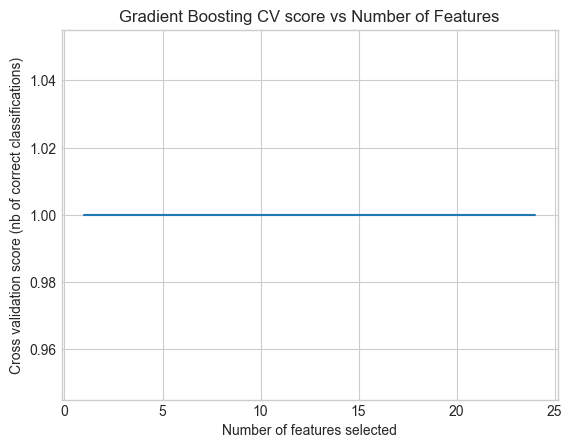

In [51]:
plt.figure()
plt.title('Gradient Boosting CV score vs Number of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

# Use rfecv.cv_results_['mean_test_score'] instead of rfecv.grid_scores_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Final Prediction

1. Predictions on validation dataset


In [52]:
# DecisionTree

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
acc_dt = round(DT.score(X_train, Y_train)*100, 2)
acc_dt

100.0

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
# DecisionTreeClassifier(class_weight=None, criterion=’gini’, max_depth=None, max_features=None, max_leaf_nodes=None,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,presort=False, random_state=None, splitter=’best’)
Y_pred = dt.predict(X_validation)

In [54]:
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_validation, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [55]:
from sklearn import tree
import graphviz 
dtree = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [56]:
# DecisionTree

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
acc_dt = round(DT.score(X_train, Y_train)*100, 2)
acc_dt

100.0

In [57]:
from sklearn import tree


cols=[feature_names] 
X_DT=X_train
Y_DT=Y_train

dtree.fit(X_DT, Y_DT)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

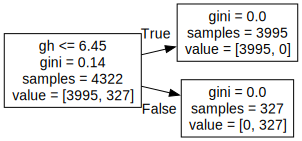

In [58]:
from sklearn import tree
import graphviz 
#dtree_view = tree.export_graphviz(dtree, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
#dtreeviz = graphviz.Source(dtree_view)
#dtreeviz


dtree_view = tree.export_graphviz(dtree, out_file=None, feature_names=X_DT.columns.values, rotate=True)
dtreeviz = graphviz.Source(dtree_view)

# Render the visualization
dtreeviz.view()  # This will open the visualized tree in the default viewer

dtreeviz
